In [33]:
import numpy as np

a = -10.0
b = 10.0
n = 100 #to take 100 points between 0 and 20

x = np.random.uniform(a, b, n)
y = np.sin(x) #defining X and y as per the question

x_test = np.random.uniform(a, b, n)
y_test = np.sin(x_test) #defining X and y as per the question

In [34]:
from scipy.interpolate import lagrange
poly = lagrange(x, y)

In [35]:
train_pred = poly(x)
test_pred = poly(x_test)

In [36]:
train_err = np.mean((y - train_pred) ** 2)
test_err = np.mean((y_test - test_pred) ** 2)
print(f"Training Error (without noise): {train_err:.4f}") #calculating MSE
print(f"Test Error (without noise): {test_err:.4f}")

Training Error (without noise): 954973922178390035012622170635178566692683968425253523042063181938688.0000
Test Error (without noise): 918720474848953714372695466352631556339941643415888276765736410546176.0000


In [37]:
err=[]
stds = [0.1, 0.35, 0.59, 0.88, 1.0]
for std_dev in stds:
  xn_train = x + np.random.normal(0, std_dev, n)
  yn_train = np.sin(xn_train)
  nlagrange = lagrange(xn_train, yn_train)
  yn_train_pred = nlagrange(xn_train)
  yn_test_pred = nlagrange(x_test)
  ntrain_error = np.mean((yn_train - yn_train_pred) ** 2)
  ntest_error = np.mean((y_test - yn_test_pred)**2)
  print(f"\nTrain Error (log) (Std Dev {std_dev}): {np.log10(ntrain_error)}")
  print(f"Test Error (log) (Std Dev {std_dev}): {np.log10(ntest_error)}")
  err.append(ntest_error)


Train Error (log) (Std Dev 0.1): 69.0180349202448
Test Error (log) (Std Dev 0.1): 69.02181848714075

Train Error (log) (Std Dev 0.35): 73.4066209963342
Test Error (log) (Std Dev 0.35): 71.58552062067655

Train Error (log) (Std Dev 0.59): 78.42276361364807
Test Error (log) (Std Dev 0.59): 72.16428375967843

Train Error (log) (Std Dev 0.88): 81.43461115037053
Test Error (log) (Std Dev 0.88): 71.8164061858295

Train Error (log) (Std Dev 1.0): 71.1681441906426
Test Error (log) (Std Dev 1.0): 67.84043770521856


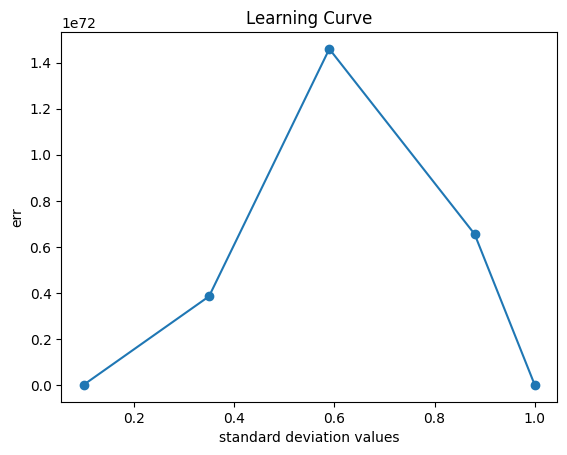

In [38]:
import matplotlib.pyplot as plt
plt.plot(stds, err, marker='o')
plt.title('Learning Curve')
plt.xlabel('standard deviation values')
plt.ylabel('err')
plt.show()